# Standard Deviation and Z-Scores

#### Standard deviation is used for measuring how spread out our data is and Z-Scores are used to calculate the number of standard deviations a data point is away from the mean

In [26]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#load the dataset
df = pd.read_csv('/Users/ashwi/Downloads/weight-height.csv')

In [28]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Height Distribution')

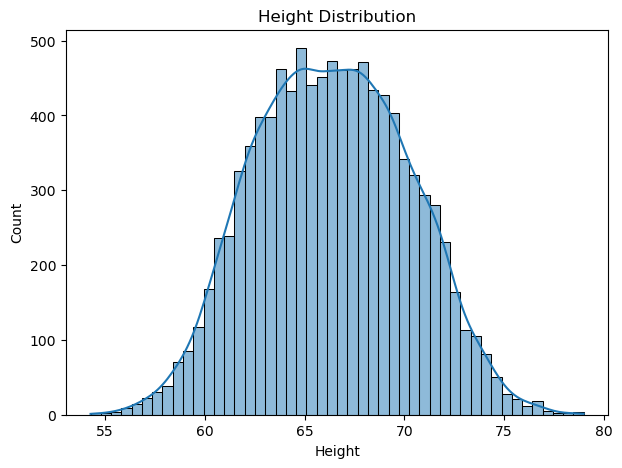

In [29]:
#visualize the distribution
plt.figure(figsize = (7,5))
sns.histplot(df.Height,kde = True)
plt.title('Height Distribution')

In [5]:
#since we will only consider the height column for our analysis, we will drop the weight column
df = df.drop('Weight',axis = 1)

In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
#calculate the std and mean of the height data
std = df.Height.std()
mean = df.Height.mean()
df['zscore'] = df['Height'].apply(lambda x:(x-mean)/std)
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [8]:
#remove the outliers in the dataset
#remove anything that is not between -3 to 3 std deviations

df[~((df['zscore']< -3) | (df['zscore'] > 3))]

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [9]:
#another example of removing outliers using percentiles and standard deviation
df1 = pd.read_csv('/Users/ashwi/Downloads/bhp.csv')

In [10]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price/SqFt. Distribution')

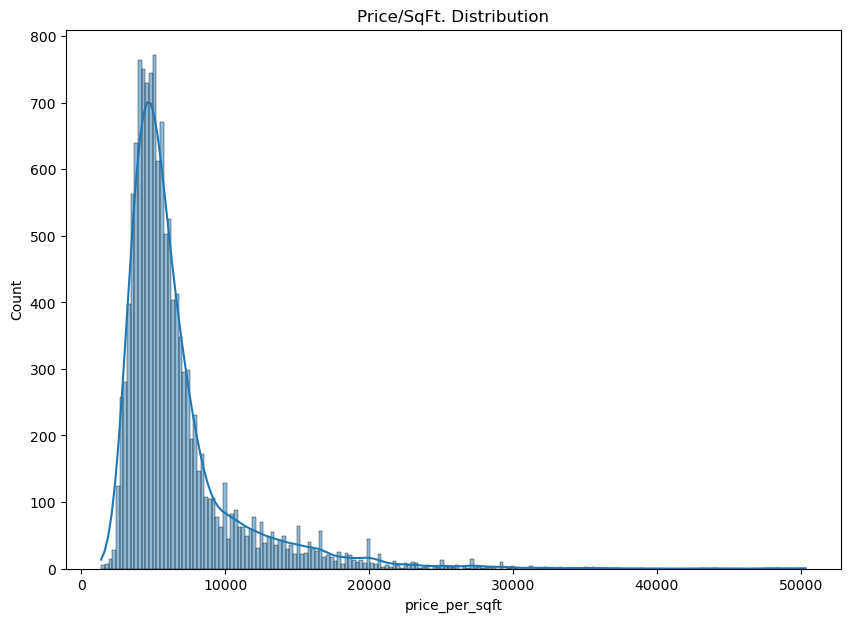

In [25]:
#visualize the distribution
plt.figure(figsize = (10,7))
sns.histplot(df1.price_per_sqft,kde=True)
plt.title('Price/SqFt. Distribution')

In [11]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
lower_limit = df1['price_per_sqft'].quantile(0.001)
upper_limit = df1['price_per_sqft'].quantile(0.999)

df1 = df1[~((df1['price_per_sqft'] < lower_limit) | (df1['price_per_sqft'] > upper_limit))]

In [22]:
mean = df1['price_per_sqft'].mean()
std = df1['price_per_sqft'].std()

df1['zscore'] = df1['price_per_sqft'].apply(lambda x:(x-mean)/std)
df1[~((df1['zscore']>4)|(df1['zscore']<-4))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967
